In [54]:
import numpy as np 
import pandas as pd

In [55]:
base_path = "NIAPU/NIAPU/"

In [56]:
nedbit_path = "src/nedbit_features_10000_20_03"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,4117,1,0.905269,2348.2310,0.351552,0.220533
1,cg00755661_CTTNBP2NL,1,4079,1,0.894332,2328.8120,0.410172,0.220729
2,cg01343097_OR2M1P,1,3927,1,0.676256,2800.4400,1.545315,0.220354
3,cg01833436_SDCCAG8,1,4281,1,0.612814,3028.1400,1.893073,0.220562
4,cg01833436_AKT3,1,4281,1,0.612814,3028.1400,1.893073,0.220562
...,...,...,...,...,...,...,...,...
11753,cg02673436_GLRX2.1,0,9,3,2.988068,159.8606,0.000046,0.001085
11754,cg05262634_CDCA8,0,12,3,2.988076,160.9487,0.000038,0.003383
11755,cg02073054_IL19,0,8,3,2.973072,164.4047,0.000037,0.003873
11756,cg02073054_IL19.1,0,8,3,2.973072,164.4047,0.000037,0.003873


In [57]:
nebit_features = df_nebit_features.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905269,2348.2310,0.351552,0.220533
1,1,0.894332,2328.8120,0.410172,0.220729
2,1,0.676256,2800.4400,1.545315,0.220354
3,1,0.612814,3028.1400,1.893073,0.220562
4,1,0.612814,3028.1400,1.893073,0.220562
...,...,...,...,...,...
11753,3,2.988068,159.8606,0.000046,0.001085
11754,3,2.988076,160.9487,0.000038,0.003383
11755,3,2.973072,164.4047,0.000037,0.003873
11756,3,2.973072,164.4047,0.000037,0.003873


In [58]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

11758 (11758, 1)


array([[ 0.80473531],
       [ 0.77793252],
       [ 1.42889026],
       ...,
       [-2.20945944],
       [-2.20945944],
       [-2.21070248]])

In [59]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905269,0.804735,0.351552,0.220533
1,1,0.894332,0.777933,0.410172,0.220729
2,1,0.676256,1.428890,1.545315,0.220354
3,1,0.612814,1.743170,1.893073,0.220562
4,1,0.612814,1.743170,1.893073,0.220562
...,...,...,...,...,...
11753,3,2.988068,-2.215731,0.000046,0.001085
11754,3,2.988076,-2.214230,0.000038,0.003383
11755,3,2.973072,-2.209459,0.000037,0.003873
11756,3,2.973072,-2.209459,0.000037,0.003873


In [60]:
output_gene_ranking_path = "src/output_gene_ranking_10000_20_03_0.05_0.2"
df_apu_labels = pd.read_csv(base_path + output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg00394221_FCRL1,0.838102,1
1,cg00755661_CTTNBP2NL,0.837460,1
2,cg01343097_OR2M1P,0.839721,1
3,cg01833436_SDCCAG8,0.838242,1
4,cg01833436_AKT3,0.838242,1
...,...,...,...
11753,cg02673436_GLRX2.1,-0.620599,5
11754,cg05262634_CDCA8,-0.620603,5
11755,cg02073054_IL19,-0.620665,5
11756,cg02073054_IL19.1,-0.620665,5


In [61]:
l_name = list()
l_labels = list()
for item in df_apu_labels.iterrows():
    #print(item[1])
    #row = item[1].values[0].split(" ")
    l_name.append(item[1][0])
    l_labels.append(item[1][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg00394221_FCRL1,1
1,cg00755661_CTTNBP2NL,1
2,cg01343097_OR2M1P,1
3,cg01833436_SDCCAG8,1
4,cg01833436_AKT3,1
...,...,...
11753,cg02673436_GLRX2.1,5
11754,cg05262634_CDCA8,5
11755,cg02073054_IL19,5
11756,cg02073054_IL19.1,5


In [62]:
labels = df_labels["labels"].tolist()

In [63]:
import umap

n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_features)

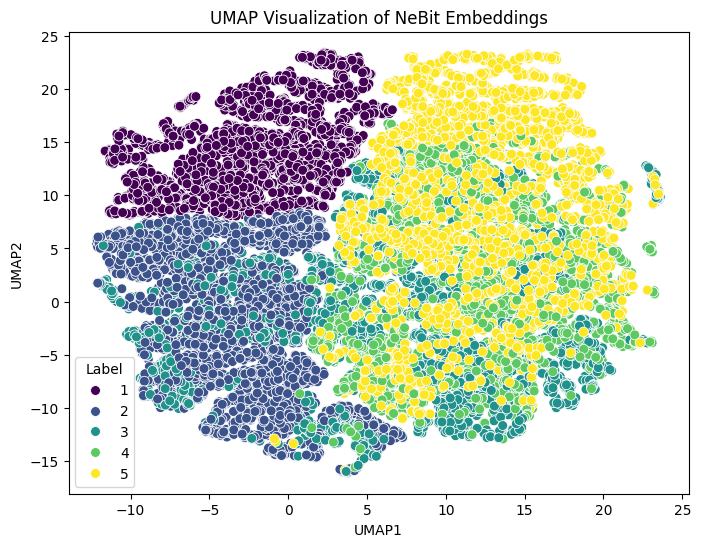

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=1.0) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeBit Embeddings")
plt.savefig(base_path + "umap_nebit_features.pdf")
plt.show()

In [ ]:
df_merged_signals = pd.read_csv("../nanodiag_datasets/GSE175758/merged_signals.csv", sep="\t", engine="c")
df_merged_signals

In [ ]:
feature_names = df_labels["feature_name"].tolist()
#feature_names[:20]

In [ ]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

In [ ]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

In [ ]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

In [ ]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

In [ ]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig(base_path + "umap_dnam_features.pdf")
plt.show()

In [ ]:
nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features

In [ ]:
n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Nebit+Methylation embeddings")
plt.savefig(base_path + "umap_nebit_dnam_features.pdf")
plt.show()

In [ ]:
df_nebit_dnam_features = nebit_dnam_features

In [ ]:
df_nebit_dnam_features["labels"] = labels

In [ ]:
df_nebit_dnam_features.to_csv("../nanodiag_datasets/GSE175758/naipu_processed_files/df_nebit_dnam_features.csv", 
                              sep="\t", header=None, index=None)



In [ ]:
feature_gene_names = dnam_signals_transpose.iloc[0:, 0]
feature_gene_names

In [ ]:
df_feature_names = pd.DataFrame(feature_gene_names)
df_feature_names.to_csv("../nanodiag_datasets/GSE175758/naipu_processed_files/df_feature_names.csv", 
                              sep="\t", index=None)
df_feature_names